In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Указание массивов координат в явном виде
x = np.zeros((5,5))
y = np.zeros((5,5))
z = np.random.rand(5,5)
for i in range(5):
    x[:,i] = i
    y[i,] = 4-i

In [3]:
z

array([[0.65519436, 0.02841632, 0.52042347, 0.1742379 , 0.78282402],
       [0.18370391, 0.92716744, 0.47243553, 0.24170528, 0.92586106],
       [0.30270501, 0.74984542, 0.74391663, 0.24867279, 0.5393767 ],
       [0.63366972, 0.37991334, 0.45260223, 0.29578189, 0.8120873 ],
       [0.55959916, 0.47520607, 0.15789054, 0.04288643, 0.9552099 ]])

In [4]:
z1 = z.flatten(order='C')
z1

array([0.65519436, 0.02841632, 0.52042347, 0.1742379 , 0.78282402,
       0.18370391, 0.92716744, 0.47243553, 0.24170528, 0.92586106,
       0.30270501, 0.74984542, 0.74391663, 0.24867279, 0.5393767 ,
       0.63366972, 0.37991334, 0.45260223, 0.29578189, 0.8120873 ,
       0.55959916, 0.47520607, 0.15789054, 0.04288643, 0.9552099 ])

In [5]:
#matrix = np.stack((x, y), axis=-1)
coords = np.zeros((25,2))
for i in range(5):
    for j in range(5):
        coords[i*5+j] = np.array([i, j])
        print(coords[i*5+j], z1[i*5+j])
#print(matrix)

[0. 0.] 0.6551943629929041
[0. 1.] 0.028416323494930285
[0. 2.] 0.5204234722650481
[0. 3.] 0.1742378988072939
[0. 4.] 0.7828240214971369
[1. 0.] 0.18370391202789282
[1. 1.] 0.9271674406447171
[1. 2.] 0.4724355272551197
[1. 3.] 0.24170528180809647
[1. 4.] 0.9258610631186195
[2. 0.] 0.30270501132152094
[2. 1.] 0.7498454158222468
[2. 2.] 0.7439166326670977
[2. 3.] 0.24867278936155623
[2. 4.] 0.5393766985553855
[3. 0.] 0.6336697244292706
[3. 1.] 0.3799133443335817
[3. 2.] 0.4526022269062465
[3. 3.] 0.29578189421680745
[3. 4.] 0.812087297338853
[4. 0.] 0.559599162417781
[4. 1.] 0.4752060723512447
[4. 2.] 0.1578905395895529
[4. 3.] 0.04288643046170815
[4. 4.] 0.9552099035987485


In [6]:
degrees = [(i, j) for i in range(3) for j in range(3) if i+j < 3]  # коэффициенты для полинома второй степени
degrees # многочлен второй степени

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0)]

$z = \beta_0 * x^0 * y^0 + \beta_1 * x^0 * y^1 + \beta_2 * x^0 * y^2 + \beta_3 * x^1 * y^0...$

In [7]:
matrix = np.stack([np.prod(coords**d, axis=1) for d in degrees], axis=-1) # значения для степеней соответствующих коэффициентов
matrix

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  2.,  4.,  0.,  0.,  0.],
       [ 1.,  3.,  9.,  0.,  0.,  0.],
       [ 1.,  4., 16.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  1.,  2.,  1.],
       [ 1.,  3.,  9.,  1.,  3.,  1.],
       [ 1.,  4., 16.,  1.,  4.,  1.],
       [ 1.,  0.,  0.,  2.,  0.,  4.],
       [ 1.,  1.,  1.,  2.,  2.,  4.],
       [ 1.,  2.,  4.,  2.,  4.,  4.],
       [ 1.,  3.,  9.,  2.,  6.,  4.],
       [ 1.,  4., 16.,  2.,  8.,  4.],
       [ 1.,  0.,  0.,  3.,  0.,  9.],
       [ 1.,  1.,  1.,  3.,  3.,  9.],
       [ 1.,  2.,  4.,  3.,  6.,  9.],
       [ 1.,  3.,  9.,  3.,  9.,  9.],
       [ 1.,  4., 16.,  3., 12.,  9.],
       [ 1.,  0.,  0.,  4.,  0., 16.],
       [ 1.,  1.,  1.,  4.,  4., 16.],
       [ 1.,  2.,  4.,  4.,  8., 16.],
       [ 1.,  3.,  9.,  4., 12., 16.],
       [ 1.,  4., 16.,  4., 16., 16.]])

In [9]:
coeff = np.linalg.lstsq(matrix, z1)[0]    # lstsq returns some additional info we ignore
coeff # коэффициенты при соответствующих членах полинома

C:\Users\sasha\AppData\Local\Temp\ipykernel_39908\2835907634.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff = np.linalg.lstsq(matrix, z1)[0]    # lstsq returns some additional info we ignore


array([ 0.47435054, -0.20554955,  0.06345847,  0.11215785, -0.00610507,
       -0.02557406])

In [10]:
fit = np.dot(matrix, coeff)
fit_2 = np.reshape(fit, (5,5))
fit_2

array([[0.47435054, 0.33225945, 0.31708531, 0.42882809, 0.66748781],
       [0.56093432, 0.41273818, 0.39145896, 0.49709668, 0.72965133],
       [0.59636998, 0.44206877, 0.41468449, 0.51421714, 0.74066673],
       [0.58065752, 0.42025124, 0.3867619 , 0.48018948, 0.700534  ],
       [0.51379693, 0.34728558, 0.30769117, 0.39501369, 0.60925315]])

In [11]:
z2 = np.reshape(z1, (5,5))
z2

array([[0.65519436, 0.02841632, 0.52042347, 0.1742379 , 0.78282402],
       [0.18370391, 0.92716744, 0.47243553, 0.24170528, 0.92586106],
       [0.30270501, 0.74984542, 0.74391663, 0.24867279, 0.5393767 ],
       [0.63366972, 0.37991334, 0.45260223, 0.29578189, 0.8120873 ],
       [0.55959916, 0.47520607, 0.15789054, 0.04288643, 0.9552099 ]])

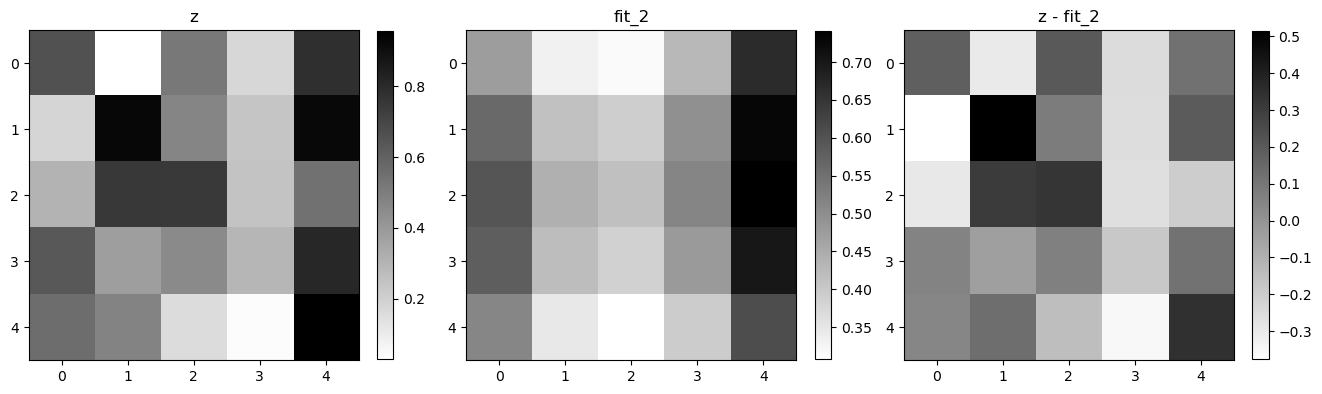

In [12]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('z')
plt.imshow(z, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('fit_2')
plt.imshow(fit_2, cmap='binary')
plt.colorbar(fraction=0.045)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('z - fit_2')
plt.imshow(np.subtract(z, fit_2), cmap='binary')
plt.colorbar(fraction=0.045)

plt.show()

In [14]:
np.subtract(z, fit_2)

array([[ 0.18084383, -0.30384313,  0.20333817, -0.25459019,  0.11533622],
       [-0.37723041,  0.51442926,  0.08097656, -0.2553914 ,  0.19620973],
       [-0.29366497,  0.30777664,  0.32923214, -0.26554436, -0.20129003],
       [ 0.05301221, -0.0403379 ,  0.06584033, -0.18440759,  0.1115533 ],
       [ 0.04580224,  0.12792049, -0.14980063, -0.35212726,  0.34595676]])

In [15]:
matrix = np.stack([np.prod(x**d, axis=1) for d in degrees], axis=-1)   # stack monomials like columns
coeff = np.linalg.lstsq(matrix, z)[0]    # lstsq returns some additional info we ignore
print("Coefficients", coeff)    # in the same order as the monomials listed in "degrees"
fit = np.dot(matrix, coeff) # вычисление рассчитанных значений на основе
print("Fitted values", fit)
print("Original values", y)

ValueError: operands could not be broadcast together with shapes (5,5) (2,) 